### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

#### 규제 선형 모델

- 선형 모델의 과적합을 방지하기 위해서 비용 함수는 RSS를 최소화하는 방법과 회귀 계수값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야한다.

 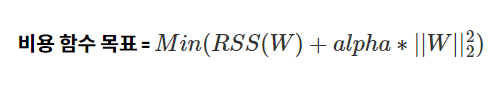

- alpha는 학습 데이터 적합 정도와 회귀 계수값의 크기 제어를 수행하는 튜닝 파라미터

- alpha가 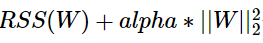를 최소화는 W벡터를 찾는 것일 때, alpha가 어떤 역할을 할까?

 - alpha가 0 또는 매우 작은 값이라면 비용 함수식은 기존과 동일할 것이다.

 - alpha가 무한대 또는 매우 큰 값이라면 비용 함수식은 RSS(W)에 비해 alpha*~ 값이 너무 커지므로 W값을 매우 작게 만들어야 cost가 최소화될 수 있을 것이다.

 - 즉, alpha값을 크게 하면 비용 함수는 W값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 W값이 커져도 어느정도 상쇄 가능하므로 학습데이터 적합을 더 개선할 수 있다.

 - 이처럼 alpha값으로 페널티를 부여하여 W값의 크기를 감소시켜 과적합을 개선하는 것을 **규제**라고 한다.

 - L2규제: W의 제곱에 페널티를 부여 >> 릿지(Lidge) 회귀

 - L1규제: W의 절댓값에 페널티를 부여, 영향력이 크지 않은 회귀계수값을 0으로 변환 >> 라쏘(Lasso) 회귀

#### 릿지 회귀

- Ridge 클래스의 주요 생성 파라미터는 alpha

- 보스턴 주택 가격 데이터를 이용하여 Ridge 클래스로 예측해보자

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

boston_df = pd.read_csv('/content/train.csv')
print('Boston 데이터셋 크기:', boston_df.shape)
boston_df.head()

Boston 데이터셋 크기: (455, 15)


,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


In [3]:
from sklearn.model_selection import train_test_split

y_target = boston_df['MEDV']
X_data = boston_df.drop(['ID', 'MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=156)

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE scores: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-20.867 -21.816 -27.417 -30.506 -25.045]
5 folds의 개별 RMSE scores: [4.568 4.671 5.236 5.523 5.005]
5 folds의 평균 RMSE scores: 5.001


앞서 규제가 없는 LienarRegression의 RMSE 평균인 4.902보다 더 뛰어난 성능을 보임

In [7]:
#alpha값을 0, 0.1, 1, 10, 100으로 변화시키기
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
  ridge = Ridge(alpha=alpha)

  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0}일 때, 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때, 5 folds의 평균 RMSE: 4.902
alpha 0.1일 때, 5 folds의 평균 RMSE: 4.905
alpha 1일 때, 5 folds의 평균 RMSE: 4.935
alpha 10일 때, 5 folds의 평균 RMSE: 5.001
alpha 100일 때, 5 folds의 평균 RMSE: 5.081


alpha가 100일 때 평균 RMSE가 5.081로 가장 좋다

이번엔 alpha값의 변화에 따른 피처의 회귀 계수값을 시각화해보자

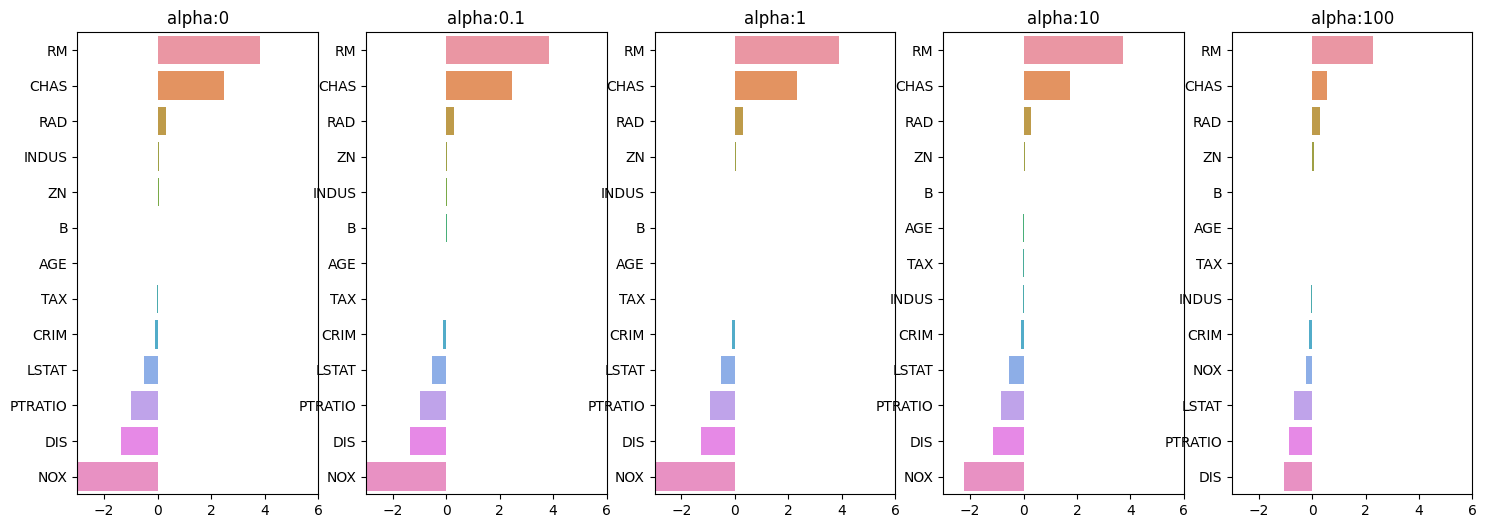

In [10]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

#각 alpha에 따른 회귀 계수값을 데이터로 저장하기 위한 데이터프레임 생성
coeff_df = pd.DataFrame()

#alphas를 차례대로 입력해서 시각화 및 데이터를 저장하고, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)

  #alpha에 따른 피처별로 회귀 계수를 series로 변환하고 이를 데이터프레임의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff

  #막대그래프로 각 alpha값에서의 회귀 계수 시각화, 높은 순으로 정렬
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

alpha값을 크게 할수록 회귀 계수값은 작아짐을 알 수 있다

특히, NOX 피처의 경우 회귀 계수가 크게 작아지고 있다

In [11]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.835419,3.844244,3.879822,3.707212,2.263519
CHAS,2.472411,2.454217,2.329910,1.735765,0.556214
RAD,0.304827,0.301866,0.286667,0.274666,0.308106
INDUS,0.049522,0.044570,0.018470,-0.015193,-0.024289
ZN,0.045509,0.045695,0.046736,0.049137,0.054637
B,0.008902,0.008958,0.009249,0.009554,0.008843
AGE,0.001784,0.000717,-0.004826,-0.010256,0.001338
TAX,-0.011962,-0.012040,-0.012480,-0.013452,-0.015272
CRIM,-0.110480,-0.109884,-0.106778,-0.103329,-0.102945
LSTAT,-0.520774,-0.522356,-0.531602,-0.560572,-0.665346


회귀 계수가 계속 작아지긴 하지만 **릿지**의 경우 계수를 0으로 만들진 않음

#### 라쏘 회귀

- L2규제가 회귀 계수를 감소시키는데 반해, L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다

- L1규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 기능을 가진다

- Lasso 클래스의 주요 생성 파라미터도 alpha

In [12]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha값을 변화시키면서 결과를 출력하는 함수 별도 생성
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
  coeff_df = pd.DataFrame()
  if verbose: print('######', model_name, '######')
  for param in params:
    if model_name =='Ridge': model = Ridge(alpha=param)
    elif model_name =='Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5 )
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

    #모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data_n, y_target_n)
    if return_coeff:
      coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
      colname = 'alpha:'+str(param)
      coeff_df[colname] = coeff

  return coeff_df

In [13]:
#라쏘에 사용할 alpha값들과 위에서 만든 함수 호출
lasso_alphas=[0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 folds의 평균 RMSE: 5.043
alpha 0.1일 때 5 folds의 평균 RMSE: 5.055
alpha 0.5일 때 5 folds의 평균 RMSE: 5.142
alpha 1일 때 5 folds의 평균 RMSE: 5.394
alpha 3일 때 5 folds의 평균 RMSE: 5.898


In [14]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.831820,3.753711,2.535333,0.980133,0.000000
CHAS,1.178886,0.685807,0.000000,0.000000,0.000000
RAD,0.265243,0.268566,0.261413,0.245823,0.041360
ZN,0.048658,0.048879,0.048899,0.048786,0.041362
B,0.009759,0.009756,0.008885,0.007666,0.005955
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011413,-0.009891,0.003359,0.020285,0.040206
INDUS,-0.012811,-0.006819,-0.000000,-0.000000,-0.000000
TAX,-0.013698,-0.013971,-0.014022,-0.013662,-0.007509
CRIM,-0.100350,-0.100005,-0.086309,-0.067722,-0.000000


일부 피처의 회귀 계수는 아예 0으로 바뀐 것을 볼 수 있다.

이 피처들은 회귀식에서 제외되면서 피처 선택의 효과를 얻을 수 있다.

#### 엘라스틱넷 회귀

- L2규제와 L1규제를 결합한 회귀

- RSS(W)+alpha2*||W||+alpha1*||W||식을 최소화하는 W를 찾는 것

- 엘라스틱넷은 라쏘 회귀의 중요 피처만을 셀렉하고 다른 피처들의 회귀 계수를 0으로 만드는 성향을 강하게 가짐

  →이런 성향 때문에 alpha값에 따라 회귀 계수값이 급격하게 변동할 수 있는데, 이를 완화하기 위해 L2규제를 라쏘에 추가한 것

- 수행시간이 오래 걸린다는 것이 단점

- ElasticNet 클래스의 주요 생성 파라미터는 alpha와 l1_ratio

  - Ridge와 Lasso의 alpha와 다른 점: ElsaticNet의 alpha는 a * L1 + b * L2 로 정의되기 때문에 a+b가 alpha값이다.

  - l1_ratio값은 a / (a+b)이다.

  - l1_ratio가 0이면 a=0이므로 L2규제와 동일하고 반대로 l1_ratio가 1이면 b=0이므로 L1규제와 동일하다.

In [15]:
#앞선 함수에서 정의했듯이 alpha값의 변화만 살피기 위해 l1_ratio값은 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07일 때 5 folds의 평균 RMSE: 5.032
alpha 0.1일 때 5 folds의 평균 RMSE: 5.040
alpha 0.5일 때 5 folds의 평균 RMSE: 5.138
alpha 1일 때 5 folds의 평균 RMSE: 5.297
alpha 3일 때 5 folds의 평균 RMSE: 5.767


In [16]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.613105,3.457683,1.952943,0.953519,0.000000
CHAS,1.153225,0.818401,0.000000,0.000000,0.000000
RAD,0.272534,0.276276,0.288871,0.270821,0.131208
ZN,0.049656,0.050234,0.052922,0.052135,0.041155
B,0.009625,0.009570,0.008592,0.007747,0.006358
AGE,-0.009946,-0.008356,0.006809,0.019435,0.042067
TAX,-0.013888,-0.014168,-0.015177,-0.014716,-0.010221
INDUS,-0.015663,-0.013629,-0.000000,-0.000000,-0.000000
CRIM,-0.101331,-0.100912,-0.090903,-0.077189,-0.027517
NOX,-0.253295,-0.000000,-0.000000,-0.000000,-0.000000


alpha가 0.5일 때 RMSE가 5.138로 가장 좋은 성능을 보임

라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있음

#### 선형 회귀 모델을 위한 데이터 변환

- 선형 모델은 일반적으로 피처와 타겟값 간에 선형 관계가 있다고 가정하고, 최적의 선형 함수를 찾아 결과를 예측한다

- 또한, 선형 회귀 모델은 피처값과 타겟값의 분포가 정규 분포 형태인 것을 선호한다

- 중요 피처들이나 타겟값의 분포도가 심하게 왜곡됐을 경우 스케일링/정규화 작업을 통해 데이터 변환 작업을 수행한다

<피처 데이터에 적용하는 변환>

1. StandardScaler를 이용해 평균 0, 분산 1인 표준 정규 분포를 가진 데이터셋으로 변환하거나 MInMaxscaler로 최소 0, 최대 1인 값으로 정규화 진행

2. 스케일링/정규화 작업을 한 데이터셋에 다시 다항 특성을 적용하여 변환하는 방법. 1번을 했는데 성능 향상이 없을 경우 2번을 적용.

3. 로그(Log) 변환. 선형 회귀에는 1, 2번 방법보다 더 많이 쓰임 >> 1번은 성능을 크게 향상시키기 어려우며 2번은 피처 개수가 많을 경우에 다항 변환으로 생성되는 피처 개수가 기하급수적으로 늘어나서 과적합 위험이 있기 때문

<타겟 데이터에 적용하는 변환>

- 일반적으로 로그 변환 적용

In [26]:
#보스턴 주택 가격 피처 데이터셋에 1. 표준 정규 분포 변환 2. 최댓값/최솟값 변환 3. 로그 변환을 차례대로 적용하자
#이를 위해 get_scaled_data() 함수 생성
#일반적으로 log() 함수를 적용하면 언더 플로우가 발생하기 쉬우므로 1+log()로 적용하기 위해 np.log1p() 사용

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

#p_degree는 다항식 특성을 추가할 때 적용, 2 이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

  return scaled_data

- 피처 데이터 변환 방법은 총 5가지, (None, None)은 원본 데이터

  - ('Standard', None) : 표준 정규 분포

  - ('Standard', 2) : 표준 정규 분포를 2차 다항식 변환

  - ('MinMax', None): 최소/최댓값 정규화

  - ('MinMax', 2) : 최소/최댓값 정규화를 2차 다항식 변환

  - ('Log', None) : 로그 변환

In [27]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None) , ('Standard', 2), ('MinMax', None),
                 ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print('\n ## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                      y_target_n=y_target, verbose=False, return_coeff=False)


 ## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 4.905
alpha 1일 때 5 folds의 평균 RMSE: 4.935
alpha 10일 때 5 folds의 평균 RMSE: 5.001
alpha 100일 때 5 folds의 평균 RMSE: 5.081

 ## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 4.902
alpha 1일 때 5 folds의 평균 RMSE: 4.899
alpha 10일 때 5 folds의 평균 RMSE: 4.889
alpha 100일 때 5 folds의 평균 RMSE: 5.039

 ## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 folds의 평균 RMSE: 3.894
alpha 1일 때 5 folds의 평균 RMSE: 3.727
alpha 10일 때 5 folds의 평균 RMSE: 3.528
alpha 100일 때 5 folds의 평균 RMSE: 3.787

 ## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 4.895
alpha 1일 때 5 folds의 평균 RMSE: 4.888
alpha 10일 때 5 folds의 평균 RMSE: 5.532
alpha 100일 때 5 folds의 평균 RMSE: 7.337

 ## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 folds의 평균 RMSE: 3.524
alpha 1일 때 5 folds의 평균 RMSE: 3.879
alpha 10일 때 5 folds의 평균 RMSE: 4.731
alpha 100일 때 5 folds의 평균 RMSE: 6.212

 ## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: